170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3999 - loss: 1.6577 - val_accuracy: 0.6064 - val_loss: 1.1448
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6195 - loss: 1.0881 - val_accuracy: 0.6439 - val_loss: 1.0177
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6681 - loss: 0.9453 - val_accuracy: 0.6637 - val_loss: 0.9619
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.7084 - loss: 0.8324 - val_accuracy: 0.6891 - val_loss: 0.9058
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7397 - loss: 0.7415 - val_accuracy: 0.6799 - val_loss: 0.9433
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7643 - loss: 0.6810 - val_accuracy: 0.6829 - val_loss: 0.9540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7907 - loss: 0.5981 - val_accuracy: 0.7009 - val_loss: 0.8891
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.8108 -

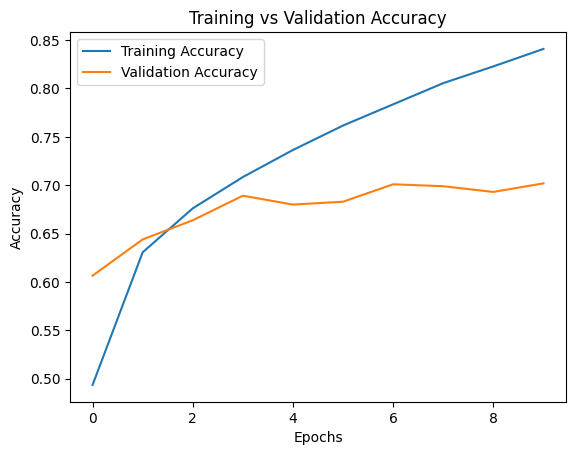

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


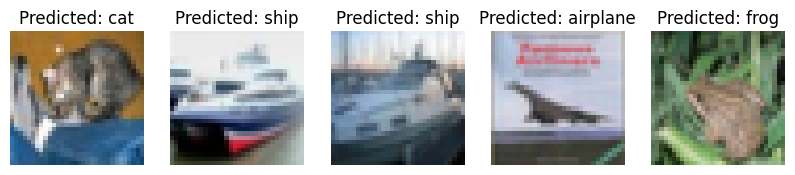

In [ ]:
# ✅ Step 1: Install & Import Required Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# ✅ Step 2: Load Dataset (Using CIFAR-10 as Example)
# CIFAR-10 contains 60,000 images (10 classes like airplane, car, dog, cat, etc.)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# ✅ Step 3: Define CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

# ✅ Step 4: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# ✅ Step 6: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🔹 Test Accuracy: {test_acc * 100:.2f}%")

# ✅ Step 7: Visualize Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# ✅ Step 8: Make Predictions on Test Data
predictions = model.predict(x_test[:5])

# ✅ Step 9: Visualize Sample Predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i])
    ax.set_title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    ax.axis('off')

plt.show()
